In [1]:
import torch
import numpy as np

from diffevo import DDIMScheduler, BayesianGenerator
from tqdm import tqdm

from diffevo.examples import two_peak_density



In [15]:
scheduler = DDIMScheduler(num_step=100)

x = torch. randn(512, 2)
trajectory = []

for t, alpha in tqdm(scheduler, total=scheduler.num_step - 1): 
      fitness = two_peak_density(x, std=0.25)
      generator = BayesianGenerator(x, fitness, alpha)
      x = generator(noise=0.1)
      trajectory.append(x)

trajectory = torch.stack(trajectory)

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:00<00:00, 299.41it/s]


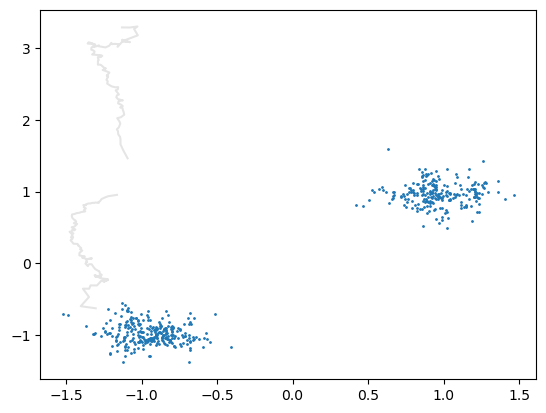

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1], s=1)
# plot the trajectory
plt.plot(trajectory[:, 0], trajectory[:, 1], 'k-', alpha=0.1)
plt.show()

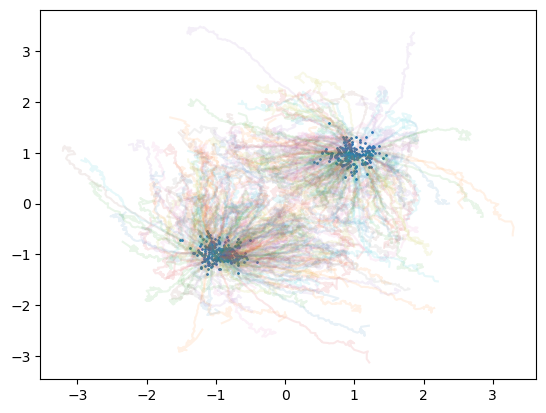

In [18]:
import matplotlib.pyplot as pit
pit.scatter(x[:, 0], x[:, 1], s=1)

# plot trajectory
for i in range(trajectory.shape[1]):
   pit.plot(trajectory[:, i, 0], trajectory[:, i, 1], alpha=0.1)

pit.show()  